In [21]:
# ns3 path
ns3_path = r"/home/william/ns-3/ns-allinone-3.40/ns-3.40"
%cd $ns3_path

comando = "/home/william/ns-3/ns-allinone-3.40/ns-3.40/ns3 run 'wifi-eht-network --simulationTime=0.1 --frequency=5 --useRts=0 --minExpectedThroughput=6 --maxExpectedThroughput=550'"

# > testes-wifi/will-EHT/will-net-test.txt

exe_ns3 = "/home/william/ns-3/ns-allinone-3.40/ns-3.40/ns3"
command = "run"

simulation_args = "'wifi-eht-network --simulationTime=0.1 --frequency=5 --useRts=0 --minExpectedThroughput=6 --maxExpectedThroughput=550'" 
outfile_path = '' 

print(simulation_args)

# a = subprocess.run([exe_ns3, command ,simulation_args], capture_output=True)

# print(type(a.stdout))
# print(str(a.stdout))

# subprocess.run(["/home/william/ns-3/ns-allinone-3.40/ns-3.40/ns3", "run" ,"'wifi-eht-network --simulationTime=0.1 --frequency=5 --useRts=0 --minExpectedThroughput=6 --maxExpectedThroughput=550'"], capture_output=True)

/home/william/ns-3/ns-allinone-3.40/ns-3.40
'wifi-eht-network --simulationTime=0.1 --frequency=5 --useRts=0 --minExpectedThroughput=6 --maxExpectedThroughput=550'


In [15]:
import time
import subprocess 

class EHTNetworkHelper:
    """Classe que facilitar a execução do eht-network do ns3"""

    def __init__(self,
                 ns3_path=r"/home/william/ns-3/ns-allinone-3.40/ns-3.40",
                 ):
        self.ns3_path = ns3_path

        self.frequency = 5  # FREQ DO PRIMEIRO LINK (2.4; 5; 6) [padrão = 5]
        self.frequency2 = None  # FREQ DO SEGUNDO LINK (0 INDICA Q ESTA DESLIGADO) [0]
        self.frequency3 = None  # FREQ DO TERCEIRO LINK (0 INDICA Q ESTA DESLIGADO) [0]
        self.distance = 1  # DISTANCIA DO STA AO AP EM METROS [padrão = 1]
        self.simulationTime = 0.1  # TEMPO DE SIMULACAO EM SEGUNDOS [10]
        self.udp = 0  # UDP if set to 1, TCP otherwise [true]
        self.downlink = 1  # Generate downlink flows if set to 1, uplink flows otherwise [true]
        self.useRts = 0  # Enable/disable RTS/CTS [false]
        self.useExtendedBlockAck = 0  # Enable/disable use of extended BACK [false]
        self.nStations = 1  # Number of non-AP HE stations [1]
        self.dlAckType = 'NO-OFDMA'  # Ack sequence type for DL OFDMA (NO-OFDMA, ACK-SU-FORMAT, MU-BAR, AGGR-MU-BAR) [NO-OFDMA]
        self.enableUlOfdma = 0  # Enable UL OFDMA (useful if DL OFDMA is enabled and TCP is used) [false]
        self.enableBsrp = 0  # Enable BSRP (useful if DL and UL OFDMA are enabled and TCP is used) [false]
        # muSchedAccessReqInterval =  # Duration of the interval between two requests for channel access made by the MU scheduler [+0fs]
        self.mcs = 11  # if set, limit testing to a specific MCS (0-11) [-1]
        self.payloadSize = 700  # The application payload size in bytes [700]
        # tputInterval =              # duration of intervals for throughput measurement [+0fs]
        self.minExpectedThroughput = 0  # if set, simulation fails if the lowest throughput is below this value [0]
        self.maxExpectedThroughput = 0  # if set, simulation fails if the highest throughput is above this value [0]

    def build_simulation_args(self):
        # argumentos da simulacao
        simulationTime_text = f" --simulationTime={self.simulationTime}"
        frequency_text = f" --frequency={self.frequency}"
        useRts_text = f" --useRts=0"
        minExpectedThroughput_text = " --minExpectedThroughput=6"
        maxExpectedThroughput_text = " --maxExpectedThroughput=550"
        mcs_text = f" --mcs={self.mcs}"

        frequency2_text = f" --frequency2={self.frequency2}"
        frequency3_text = f" --frequency3={self.frequency3}"
        distance_text = f" --distance={self.distance}"
        udp_text = f" --udp={self.udp}"
        downlink_text = f" --downlink={self.downlink}"
        useExtendedBlockAck_text = f" --useExtendedBlockAck={self.useExtendedBlockAck}"
        nStations_text = f" --nStations={self.nStations}"
        dlAckType_text = f" --dlAckType={self.dlAckType}"
        enableUlOfdma_text = f" --enableUlOfdma={self.enableUlOfdma}"
        enableBsrp_text = f" --enableBsrp={self.enableBsrp}"
        # muSchedAccessReqInterval =  # Duration of the interval between two requests for channel access made by the MU scheduler [+0fs]
        payloadSize_text = f" --payloadSize={self.payloadSize}"
        # tputInterval =              # duration of intervals for throughput measurement [+0fs]

        # SETANDO OS PARAMETROS DO OCMANDO DA SIMULACAO
        
        list_of_params = [
            simulationTime_text,
            frequency_text,
            # frequency2_text,
            # frequency3_text,
            udp_text,
            useRts_text,
            mcs_text,
            distance_text,
            nStations_text,
            dlAckType_text,
            enableUlOfdma_text,
            useExtendedBlockAck_text,
        ]

        if self.frequency2 is not None:
            list_of_params.append(frequency2_text)
        if self.frequency3 is not None:
            list_of_params.append(frequency3_text)
        
        # MONTA O COMANDO DA SIMULACAO COM OS ARGUMENTOS
        simulation_args = f"'wifi-eht-network "
        for param in list_of_params:
            simulation_args += param
        simulation_args += "'"

        return simulation_args

    def run(self, output_file_name="teste"):
        exe_ns3 = "/home/william/ns-3/ns-allinone-3.40/ns-3.40/ns3"
        command = "run"
        simulation_args = self.build_simulation_args()

        # RUN MODE
        result = subprocess.run([exe_ns3, command, simulation_args], capture_output=True)

        self.save_output(result, output_file_name)

        return result

    def test_run(self):
        print("comando:", runner.build_simulation_args())
        print("RODANDO...")
        resultado = runner.run()
        print("RESULTADO \n", resultado.stdout.decode("utf-8"))

    def save_output(self, resultado, output_file_name):
        # SALVA A SAIDA EM UM ARQUIVO
        
        # PEGAR O INSTANTE DE TEMPO PARA N TER NOME DE ARQUIVOS REPETIDOS
        time_millisec = int(round(time.time() * 1000))

        # Defina o caminho completo do arquivo
        caminho = f"resultados_william/{output_file_name}_{time_millisec}.txt"
        print(f"output_f: {caminho}")

        output = resultado.stdout.decode("utf-8")
        linhas = output.splitlines()[2:] # ELIMINA AS 2 PRIMEIRAS LINHAS DA SAIDA
        output_tratado = "\n".join(linhas)

        # Abra o arquivo para escrita
        with open(caminho, "w") as arquivo:
            # Escreva no arquivo
            arquivo.write(output_tratado)

        pass



In [1]:
print('oi')

oi


### TESTANDO O RUNNER

In [8]:
ns3_path = r"/home/william/ns-3/ns-allinone-3.40/ns-3.40"
%cd $ns3_path


runner = EHTNetworkHelper()


print("comando:", runner.build_simulation_args())
print("RODANDO...")

# runner.run(output_file_name=f'dist_{metros}m')

runner.run(output_file_name=f'/testes/teste_random_')


/home/william/ns-3/ns-allinone-3.40/ns-3.40
comando: 'wifi-eht-network  --simulationTime=1 --frequency=5 --udp=0 --useRts=0 --mcs=11 --distance=1 --nStations=1 --dlAckType=NO-OFDMA --enableUlOfdma=0 --useExtendedBlockAck=0'
RODANDO...
output_f: resultados_william//testes/teste_random__1717127810966.txt


CompletedProcess(args=['/home/william/ns-3/ns-allinone-3.40/ns-3.40/ns3', 'run', "'wifi-eht-network  --simulationTime=1 --frequency=5 --udp=0 --useRts=0 --mcs=11 --distance=1 --nStations=1 --dlAckType=NO-OFDMA --enableUlOfdma=0 --useExtendedBlockAck=0'"], returncode=0, stdout=b'[0/2] Re-checking globbed directories...\nninja: no work to do.\nMCS value\t\tChannel width\t\tGI\t\t\tThroughput\n11\t\t\t20 MHz\t\t\t3200 ns\t\t\t83.9776 Mbit/s\n11\t\t\t20 MHz\t\t\t1600 ns\t\t\t84.8624 Mbit/s\n11\t\t\t20 MHz\t\t\t800 ns\t\t\t97.2272 Mbit/s\n11\t\t\t40 MHz\t\t\t3200 ns\t\t\t155.674 Mbit/s\n11\t\t\t40 MHz\t\t\t1600 ns\t\t\t157.41 Mbit/s\n11\t\t\t40 MHz\t\t\t800 ns\t\t\t179.2 Mbit/s\n11\t\t\t80 MHz\t\t\t3200 ns\t\t\t277.861 Mbit/s\n11\t\t\t80 MHz\t\t\t1600 ns\t\t\t277.603 Mbit/s\n11\t\t\t80 MHz\t\t\t800 ns\t\t\t313.488 Mbit/s\n11\t\t\t160 MHz\t\t\t3200 ns\t\t\t431.329 Mbit/s\n11\t\t\t160 MHz\t\t\t1600 ns\t\t\t429.677 Mbit/s\n11\t\t\t160 MHz\t\t\t800 ns\t\t\t470.702 Mbit/s\n', stderr=b'')

# RODANDO SCRIPTS EM FUNCAO DO Nº DE STAs

In [6]:
ns3_path = r"/home/william/ns-3/ns-allinone-3.40/ns-3.40"
%cd $ns3_path

passo_avanco=50
num_simulacoes=5

runner = EHTNetworkHelper()

for i in range(num_simulacoes):
    
    qtd = 1 + (i*passo_avanco)
    runner.nStations = qtd
    runner.mcs = 11

    print("comando:", runner.build_simulation_args())
    print("RODANDO...")
    runner.run(output_file_name=f'stas_{qtd}')


/home/william/ns-3/ns-allinone-3.40/ns-3.40
comando: 'wifi-eht-network  --simulationTime=10 --frequency=5 --udp=0 --useRts=0 --mcs=11 --distance=1 --nStations=1 --dlAckType=NO-OFDMA --enableUlOfdma=0 --useExtendedBlockAck=0'
RODANDO...
output_f: resultados_william/stas_1_1717127396525.txt


data: {'n_stas': 1, 'Throughput': 546.112}
data: {'n_stas': 51, 'Throughput': 473.536}
data: {'n_stas': 101, 'Throughput': 537.376}
data: {'n_stas': 151, 'Throughput': 329.728}
data: {'n_stas': 201, 'Throughput': 414.4}
   n_stas  Throughput
0       1     546.112
1      51     473.536
2     101     537.376
3     151     329.728
4     201     414.400


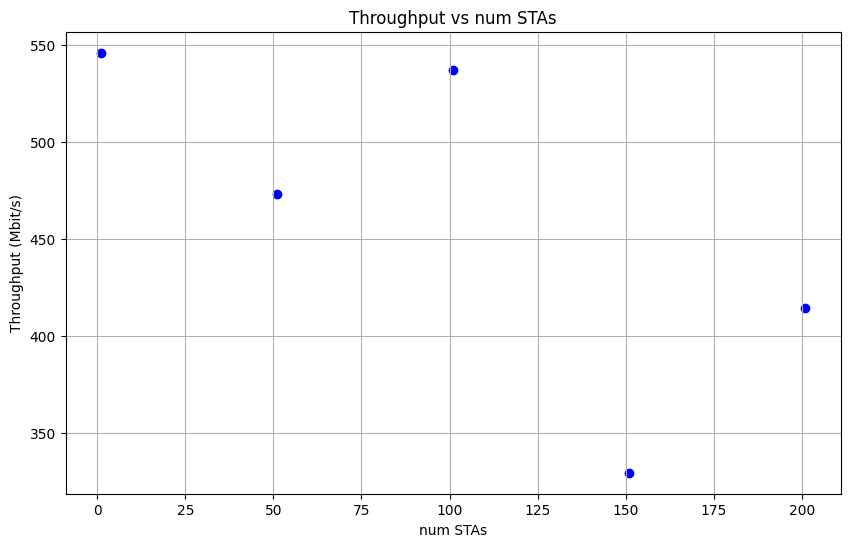

In [4]:
import fileinput
import sys
import os
import argparse
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


def list_file_n_foldes(dir_dist_path):
    """Lista quais sao as pastas e arquivos de um dado caminho"""
    # LISTA TUDO DENTRO DA PASTA
    arquivos = os.listdir(str(dir_dist_path))
    folders = []
    files = []
    for arquivo in arquivos:
        if os.path.isdir(dir_dist_path + r'/' + arquivo):
            folders.append(dir_dist_path + r'/' + arquivo)
        else:
            files.append(dir_dist_path + r'/' + arquivo)
    return files, folders


# Definir o caminho para o arquivo de texto
# file_path = r'\\wsl.localhost\Ubuntu-20.04\home\william\ns-3\ns-allinone-3.40\ns-3.40\resultados_william\stas_25_1716949657016.txt'

# WINDOWS
# folder_path = r'\\wsl.localhost\Ubuntu-20.04\home\william\ns-3\ns-allinone-3.40\ns-3.40\resultados_william'
# UBUNTU
folder_path = r'/home/william/ns-3/ns-allinone-3.40/ns-3.40/resultados_william'

file_path = folder_path + r'/stas_25_1716949657016.txt'

files, folders = list_file_n_foldes(folder_path)

num_stas_list = []
tput_list = []
final_data = {'n_stas': [], 'Throughput': []}

# Criar um DataFrame a partir dos dados
columns = ['n_stas', 'Throughput']
df_final = pd.DataFrame(columns=columns)

for i, file in enumerate(files):

    num_stas = 1+(i*50)

    # print(file)
    file_path = file

    # Ler o arquivo de texto
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()

    # print(f"lines: {len(lines)}")

    # VERIFICA SE A SAIDA DA SIMULACAO ESTA MINIMAMENTE COERENTE, SE N PULA PRA O PROXIMO
    if len(lines) < 13:
        print(file)
        print('QUEBRADO!!!')
        continue

    # Processar as linhas para extrair as informações
    data = []
    for line in lines[1:]:  # Pular o cabeçalho

        # print(line)
        # RETIRA AS UNIDADES DOS DADOS
        line = line.replace('Mbit/s', '')
        line = line.replace('MHz', '')
        line = line.replace('ns', '')
        # print(line)

        # Dividir a linha por tabulações ou múltiplos espaços
        parts = line.split()
        # print(parts)

        # # Adicionar os dados à lista
        mcs_value = int(parts[0])
        channel_width = int(parts[1])
        gi = int(parts[2])
        throughput = float(parts[3])

        # ADICIONA OS DADOS
        data.append([mcs_value, channel_width, gi, throughput])

    # Criar um DataFrame a partir dos dados
    columns = ['MCS', 'Channel_width', 'GI', 'Throughput']
    df = pd.DataFrame(data, columns=columns)

    # print(df)

    # FILTRO
    subset_complex = df[((df['Channel_width'] == 160) & (df['GI'] == 800))]

    # TODO > DESCOBRIR COMO PEGA 1 VALOR ESPECIFICO DO DATA FRAME
    # TODO > POR ENQUANTO TO PASSANDO O MAIOR VALOR DO DF
    tput = subset_complex['Throughput']

    linha_data = {'n_stas': num_stas, 'Throughput': tput.max()}
    final_data['n_stas'].append(num_stas)
    final_data['Throughput'].append(tput.max())

    # print('coletado:', tput)
    print('data:', linha_data)

print('=====================')

# print(final_data)
df_final = pd.DataFrame(final_data)
print(df_final)

plt.figure(figsize=(10, 6))
plt.scatter(df_final['n_stas'], df_final['Throughput'], color='b', marker='o')
plt.title('Throughput vs num STAs')
plt.xlabel('num STAs')
plt.ylabel('Throughput (Mbit/s)')
plt.grid(True)
plt.show()



# RODANDO SCRIPTS EM FUNCAO DA DISTANCIA

In [16]:
ns3_path = r"/home/william/ns-3/ns-allinone-3.40/ns-3.40"
%cd $ns3_path

passo_avanco=1
num_simulacoes=10

runner = EHTNetworkHelper()

# DEFINE OS PARAMETROS ESTATICOS DA SIMULACAO

runner.frequency=6 
# runner.frequency2=5 

runner.simulationTime=0.25 
runner.udp=0 
runner.downlink=1 
runner.useRts=0 
runner.nStations=1
runner.enableUlOfdma=1 
runner.enableBsrp=1 
runner.mcs=12 
runner.useExtendedBlockAck=1 
# self.minExpectedThroughput=40 
# self.maxExpectedThroughput=100


for i in range(num_simulacoes):
    metros = 1 + (i*passo_avanco)
    runner.distance = metros

    print("comando:", runner.build_simulation_args())
    print("RODANDO...")

    runner.frequency=6
    runner.run(output_file_name=f'/1_link_distance_6hz/{runner.frequency}_dist_{metros}m')

    # runner.frequency=2.4
    # runner.run(output_file_name=f'/1_link_distance_24hz/{runner.frequency}_dist_{metros}m')

    # runner.frequency=5
    # runner.run(output_file_name=f'/1_link_distance_5hz/{runner.frequency}_dist_{metros}m')



/home/william/ns-3/ns-allinone-3.40/ns-3.40
comando: 'wifi-eht-network  --simulationTime=0.25 --frequency=6 --udp=0 --useRts=0 --mcs=12 --distance=1 --nStations=1 --dlAckType=NO-OFDMA --enableUlOfdma=1 --useExtendedBlockAck=1'
RODANDO...
output_f: resultados_william//1_link_distance_6hz/6_dist_1m_1717733240359.txt
comando: 'wifi-eht-network  --simulationTime=0.25 --frequency=6 --udp=0 --useRts=0 --mcs=12 --distance=2 --nStations=1 --dlAckType=NO-OFDMA --enableUlOfdma=1 --useExtendedBlockAck=1'
RODANDO...
output_f: resultados_william//1_link_distance_6hz/6_dist_2m_1717733269044.txt
comando: 'wifi-eht-network  --simulationTime=0.25 --frequency=6 --udp=0 --useRts=0 --mcs=12 --distance=3 --nStations=1 --dlAckType=NO-OFDMA --enableUlOfdma=1 --useExtendedBlockAck=1'
RODANDO...
output_f: resultados_william//1_link_distance_6hz/6_dist_3m_1717733297838.txt
comando: 'wifi-eht-network  --simulationTime=0.25 --frequency=6 --udp=0 --useRts=0 --mcs=12 --distance=4 --nStations=1 --dlAckType=NO-OFDMA 

# PLOT DISTÂNCIA

freq: 2.4 dist: 8
parts: ['12', '20', '3200', '85.7472']
parts: ['12', '20', '1600', '90.9888']
parts: ['12', '20', '800', '99.3216']
parts: ['12', '40', '3200', '158.144']
parts: ['12', '40', '1600', '165.424']
parts: ['12', '40', '800', '181.955']
data: {'Distance': 8, 'Throughput': 181.955}
freq: 2.4 dist: 2
parts: ['12', '20', '3200', '85.7472']
parts: ['12', '20', '1600', '90.9888']
parts: ['12', '20', '800', '99.3216']
parts: ['12', '40', '3200', '159.174']
parts: ['12', '40', '1600', '166.41']
parts: ['12', '40', '800', '182.022']
data: {'Distance': 2, 'Throughput': 182.022}
freq: 2.4 dist: 7
parts: ['12', '20', '3200', '85.7472']
parts: ['12', '20', '1600', '90.9888']
parts: ['12', '20', '800', '99.3216']
parts: ['12', '40', '3200', '159.174']
parts: ['12', '40', '1600', '166.41']
parts: ['12', '40', '800', '182.022']
data: {'Distance': 7, 'Throughput': 182.022}
freq: 2.4 dist: 10
parts: ['12', '20', '3200', '85.7472']
parts: ['12', '20', '1600', '89.5776']
parts: ['12', '20', 

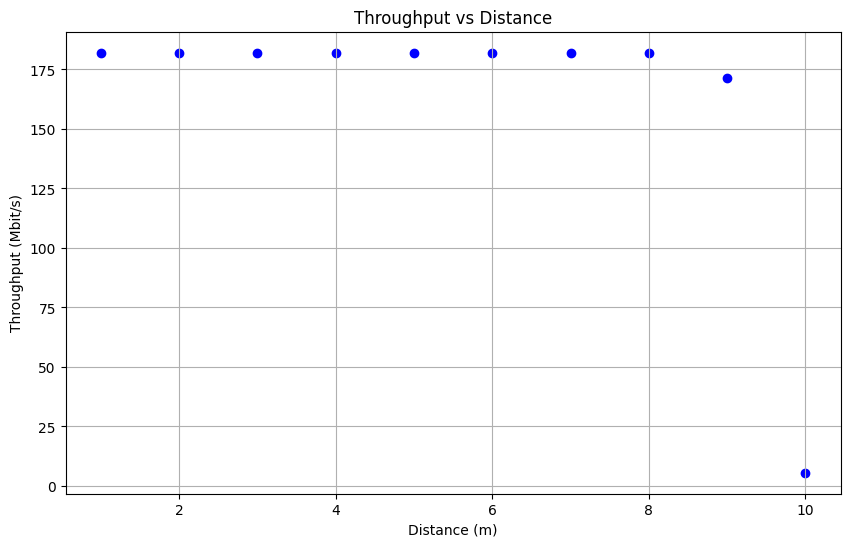

In [18]:
import fileinput
import sys
import os
import argparse
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


def list_file_n_foldes(dir_dist_path):
    """Lista quais sao as pastas e arquivos de um dado caminho"""
    # LISTA TUDO DENTRO DA PASTA
    arquivos = os.listdir(str(dir_dist_path))
    folders = []
    files = []
    for arquivo in arquivos:
        if os.path.isdir(dir_dist_path + r'/' + arquivo):
            folders.append(dir_dist_path + r'/' + arquivo)
        else:
            files.append(dir_dist_path + r'/' + arquivo)
    return files, folders


# Definir o caminho para o arquivo de texto
# file_path = r'\\wsl.localhost\Ubuntu-20.04\home\william\ns-3\ns-allinone-3.40\ns-3.40\resultados_william\stas_25_1716949657016.txt'

# WINDOWS
# folder_path = r'\\wsl.localhost\Ubuntu-20.04\home\william\ns-3\ns-allinone-3.40\ns-3.40\resultados_william\1_link_distance_5hz'

# UBUNTU
# folder_path = r'/home/william/ns-3/ns-allinone-3.40/ns-3.40/resultados_william/1_link_distance_24hz'
# folder_path = r'/home/william/ns-3/ns-allinone-3.40/ns-3.40/resultados_william/1_link_distance_5hz'
folder_path = r'/home/william/ns-3/ns-allinone-3.40/ns-3.40/resultados_william/1_link_distance_24hz'

file_path = folder_path + r'/stas_25_1716949657016.txt'

files, folders = list_file_n_foldes(folder_path)

num_stas_list = []
tput_list = []
final_data = {'Distance': [], 'Throughput': []}

# Criar um DataFrame a partir dos dados
columns = ['Distance', 'Throughput']
df_final = pd.DataFrame(columns=columns)


for i, file in enumerate(files):

    # PEGA DADOS DO TITULO DO ARQUIVO
    path_names = file.split('/')
    file_name = path_names[-1]
    simulation_title_parts = file_name.split('_')

    frequency = float(simulation_title_parts[0])
    dist = int(simulation_title_parts[2].replace('m', ''))

    # print(file_name)
    print('freq:', frequency, 'dist:', dist)

    file_path = file

    # Ler o arquivo de texto
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()

    # print(f"lines: {len(lines)}")

    # VERIFICA SE A SAIDA DA SIMULACAO ESTA MINIMAMENTE COERENTE, SE N PULA PRA O PROXIMO
    if frequency == 2.4 and len(lines) < 6:
        print(file)
        print('QUEBRADO!!!')
        continue
    elif frequency != 2.4 and len(lines) < 13:
        print(file)
        print('QUEBRADO!!!')
        continue

    # Processar as linhas para extrair as informações
    data = []
    for line in lines[1:]:  # Pular o cabeçalho

        if 'Command' in line:
            continue
        
        # print(line)
        # RETIRA AS UNIDADES DOS DADOS
        line = line.replace('Mbit/s', '')
        line = line.replace('MHz', '')
        line = line.replace('ns', '')
        # print(line)

        # Dividir a linha por tabulações ou múltiplos espaços
        parts = line.split()
        print('parts:', parts)

        # # Adicionar os dados à lista
        mcs_value = int(parts[0])
        channel_width = int(parts[1])
        gi = int(parts[2])
        throughput = float(parts[3])

        # ADICIONA OS DADOS
        data.append([mcs_value, channel_width, gi, throughput, frequency, dist])

    # Criar um DataFrame a partir dos dados
    columns = ['MCS', 'Channel_width', 'GI', 'Throughput', 'Frequency', 'Distance']
    df = pd.DataFrame(data, columns=columns)

    # print(df)

    # FILTRO
    subset_complex = df[((df['Channel_width'] == 40) & (df['GI'] == 800))]

    # TODO > DESCOBRIR COMO PEGA 1 VALOR ESPECIFICO DO DATA FRAME
    # TODO > POR ENQUANTO TO PASSANDO O MAIOR VALOR DO DF
    tput = subset_complex['Throughput']

    linha_data = {'Distance': dist, 'Throughput': tput.max()}
    final_data['Distance'].append(dist)
    final_data['Throughput'].append(tput.max())

    # print('coletado:', tput)
    print('data:', linha_data)

print('=====================')

# print(final_data)
df_final = pd.DataFrame(final_data)
print(df_final)

plt.figure(figsize=(10, 6))
plt.scatter(df_final['Distance'], df_final['Throughput'], color='b', marker='o')
plt.title('Throughput vs Distance')
plt.xlabel('Distance (m)')
plt.ylabel('Throughput (Mbit/s)')
plt.grid(True)
plt.show()

